<font size= 13em>Datapipeline <font size=13em color=red>N<font color=green>E<font color=black>C</h3>

In [339]:
#Gebruikt om dingen te berekenen.
import numpy as np
#Dataframes maken van de csv files.
import pandas as pd
#Plot kunnen maken van de snelheid over de gehele wedstrijd
import matplotlib.pyplot as plt
import matplotlib
#Nodig om de gemiddeldes en standdeviaties te berekenen
import scipy as sci
import scipy.stats
#XML bestand inlezen
import xml.etree.ElementTree as ET
#Met tijd kunnen rekenen en werken
import datetime
#Bokeh import om de acceleratie van de speler te laten zien
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import row
from bokeh.layouts import gridplot
from bokeh.charts import Histogram
from bokeh.charts import BoxPlot
from bokeh.charts import Scatter
from bokeh.charts import Line
from bokeh.charts import Horizon
#Sklearn om de Regressie van Longitude en Latitude te berekenen en te plotten
from sklearn.linear_model import LinearRegression 

In [340]:
FCU_NEC_parse= ET.parse('20160410_FC_Utrecht-NEC.xml')
FCU_NEC_root = FCU_NEC_parse.getroot()

<font size=5em>Ruwe data uit txt(csv) bestand</font><br>
Hier zal alleen de ruwe data van het CSV van een wedstrijd zichbaar zijn.
Deze data is nog niet gecorrigeerd om te kunnen werken met het XML bestand.

In [341]:
speler = pd.read_csv('20160410FC_Utrecht-NEC/00fa2184833d4b61a53820b0390fb3c6.txt',sep=',', header=0, names=['GPStijd','dt(ms)', 'latitude', 'longitude','snelheid(m/s)','acc_x(g-force)','acc_y', 'acc_z', 'gyro_x(deg/s)','gyro_y','gyro_z','heart rate(bpm)'],skiprows=range(0,3),na_values='-')
speler = speler.dropna()
speler

,GPStijd,dt(ms),latitude,longitude,snelheid(m/s),acc_x(g-force),acc_y,acc_z,gyro_x(deg/s),gyro_y,gyro_z,heart rate(bpm)
5447,115502.1,9,52.078442,5.145780,0.87,0.754,-0.093,0.372,120.137,-34.779,8.870,0
5449,115502.3,8,52.078435,5.145776,0.36,0.918,-0.199,0.085,77.237,-7.069,8.962,0
5450,115502.4,8,52.078444,5.145782,0.27,1.176,-0.155,0.179,-34.763,13.389,-0.229,0
5451,115502.5,8,52.078450,5.145788,0.63,1.191,-0.155,0.167,-75.635,47.873,-28.812,0
5452,115502.6,8,52.078446,5.145784,0.56,1.073,-0.215,0.012,-37.756,54.870,-18.519,0
5453,115502.7,8,52.078436,5.145778,0.41,0.919,-0.235,0.050,8.275,36.168,-33.023,0
5454,115502.8,8,52.078434,5.145776,0.47,0.761,-0.321,0.288,12.611,-10.076,4.580,0
5455,115502.9,9,52.078434,5.145776,0.47,1.006,-0.220,0.327,-24.229,-38.931,10.107,0
5456,115503.0,8,52.078434,5.145776,0.48,0.835,-0.257,0.330,-69.791,-18.116,5.641,0
5457,115503.1,8,52.078435,5.145777,0.46,1.117,-0.167,0.086,-70.580,-12.092,7.435,0


Tijd in XML file is UTC+2 dus hier ook nog 2 uur bij optellen. Nu klopt het met de XML file.

In [342]:
rowCount = len(speler.index)
ophoogarray = np.zeros((rowCount,12))
ophoogarray[:rowCount,0] = 20000
ophoogarray

array([[ 20000.,      0.,      0., ...,      0.,      0.,      0.],
       [ 20000.,      0.,      0., ...,      0.,      0.,      0.],
       [ 20000.,      0.,      0., ...,      0.,      0.,      0.],
       ..., 
       [ 20000.,      0.,      0., ...,      0.,      0.,      0.],
       [ 20000.,      0.,      0., ...,      0.,      0.,      0.],
       [ 20000.,      0.,      0., ...,      0.,      0.,      0.]])

<font size=5em>Gecorrigeerde Data</font><br>
Data is nu gelijk aan de XML file van de wedstrijd omdat de tijd nu goed staat

In [343]:
copy = speler
spelerCor = copy+ophoogarray
spelerCor

,GPStijd,dt(ms),latitude,longitude,snelheid(m/s),acc_x(g-force),acc_y,acc_z,gyro_x(deg/s),gyro_y,gyro_z,heart rate(bpm)
5447,135502.1,9.0,52.078442,5.145780,0.87,0.754,-0.093,0.372,120.137,-34.779,8.870,0.0
5449,135502.3,8.0,52.078435,5.145776,0.36,0.918,-0.199,0.085,77.237,-7.069,8.962,0.0
5450,135502.4,8.0,52.078444,5.145782,0.27,1.176,-0.155,0.179,-34.763,13.389,-0.229,0.0
5451,135502.5,8.0,52.078450,5.145788,0.63,1.191,-0.155,0.167,-75.635,47.873,-28.812,0.0
5452,135502.6,8.0,52.078446,5.145784,0.56,1.073,-0.215,0.012,-37.756,54.870,-18.519,0.0
5453,135502.7,8.0,52.078436,5.145778,0.41,0.919,-0.235,0.050,8.275,36.168,-33.023,0.0
5454,135502.8,8.0,52.078434,5.145776,0.47,0.761,-0.321,0.288,12.611,-10.076,4.580,0.0
5455,135502.9,9.0,52.078434,5.145776,0.47,1.006,-0.220,0.327,-24.229,-38.931,10.107,0.0
5456,135503.0,8.0,52.078434,5.145776,0.48,0.835,-0.257,0.330,-69.791,-18.116,5.641,0.0
5457,135503.1,8.0,52.078435,5.145777,0.46,1.117,-0.167,0.086,-70.580,-12.092,7.435,0.0


In [344]:
starttijd = FCU_NEC_root[0][0].text
print(starttijd)
tijdVoorDT = starttijd[:-7]
tijd = starttijd[11:21]
print(tijd)
tijdCor = tijd.replace(':','')
print(tijdCor)
#Note: Zoals je ziet is de starttijd .93, er wordt hier echter in .X van een seconde gewerkt in het csv bestand 
# dus wordt de 0.03 weggelaten zodat er geen fouten op gaan treden.

2016-04-10 14:24:38.93 +0200
14:24:38.9
142438.9


<font size=5em>Alle GPStijden tijdens de wedstrijd</font><br>
De tijden uit het CSV bestand zijn nu weg gelaten als ze niet tijdens de wedstrijd vielen. Alles voor de bovenstaande tijd wordt hier dus weg gelaten.

In [345]:
newCor = []
i = 0
for g in spelerCor['GPStijd']:
    if float(g) < float(tijdCor):
        i += 1
    if float(g) >= float(tijdCor):
        newCor = spelerCor[i:]
        break
newCor

,GPStijd,dt(ms),latitude,longitude,snelheid(m/s),acc_x(g-force),acc_y,acc_z,gyro_x(deg/s),gyro_y,gyro_z,heart rate(bpm)
25078,142756.3,8.0,52.078809,5.146010,0.28,0.884,-0.467,-0.148,-33.832,3.084,-18.901,0.0
25080,142756.5,8.0,52.078807,5.146152,0.55,0.853,-0.334,-0.135,2.595,-3.252,-16.244,0.0
25081,142756.6,9.0,52.078817,5.146142,0.35,0.979,-0.334,-0.139,3.191,-17.954,-12.641,0.0
25082,142756.7,8.0,52.078831,5.146131,0.23,1.102,-0.367,-0.072,27.412,-20.347,-9.040,0.0
25083,142756.8,8.0,52.078831,5.146108,0.67,0.822,-0.462,0.099,19.740,40.092,-8.885,0.0
25084,142756.9,8.0,52.078806,5.146063,0.89,0.906,-0.445,0.203,15.450,42.244,3.389,0.0
25085,142757.0,9.0,52.078789,5.146016,0.53,0.823,-0.375,0.202,-3.069,36.366,5.008,0.0
25086,142757.1,8.0,52.078777,5.145959,0.47,0.767,-0.607,0.343,-48.443,18.382,1.221,0.0
25087,142757.2,9.0,52.078789,5.145947,0.45,1.300,-0.594,0.029,-7.053,-20.718,11.542,0.0
25088,142757.3,9.0,52.078789,5.145936,0.37,0.769,-0.428,0.063,-47.954,23.053,11.206,0.0


<font size=5em>Gegevens uit dataset om zo mee te plotten</font><br>
Deze data wordt straks gebruikt om er een date_plot mee te maken die de snelheid van een speler over een wedstrijd gaat laten zien.

In [346]:
speedList = newCor['snelheid(m/s)'].values[:rowCount]
speedList

array([ 0.28,  0.55,  0.35, ...,  0.09,  0.09,  0.09])

In [347]:
dateString_list = newCor['GPStijd'].values[:rowCount]
dates_list=[]
for date in dateString_list:
    dateReal = datetime.datetime.strptime(str(date),"%H%M%S.%f")
    dates_list.append(dateReal)
dates_list

[datetime.datetime(1900, 1, 1, 14, 27, 56, 300000),
 datetime.datetime(1900, 1, 1, 14, 27, 56, 500000),
 datetime.datetime(1900, 1, 1, 14, 27, 56, 600000),
 datetime.datetime(1900, 1, 1, 14, 27, 56, 700000),
 datetime.datetime(1900, 1, 1, 14, 27, 56, 800000),
 datetime.datetime(1900, 1, 1, 14, 27, 56, 900000),
 datetime.datetime(1900, 1, 1, 14, 27, 57),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 100000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 200000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 300000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 400000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 500000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 600000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 700000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 800000),
 datetime.datetime(1900, 1, 1, 14, 27, 57, 900000),
 datetime.datetime(1900, 1, 1, 14, 27, 58),
 datetime.datetime(1900, 1, 1, 14, 27, 58, 100000),
 datetime.datetime(1900, 1, 1, 14, 27, 58, 200000),
 datetime.datetime(1900, 1, 

<font size=5em>Tijden uit XML toevoegen aan de starttijd</font><br>
De tijden die in het XML bestand staan onder de tags < start > en < end > worden bij de begintijd van de wedstrijd opgeteld om te weten hoe laat in de wedstrijd een gebeurtenis plaats vindt.

In [348]:
i = 1

wedstrijdStartTijd = datetime.datetime.strptime(tijdVoorDT,"%Y-%m-%d %H:%M:%S.%f")
print(str(wedstrijdStartTijd))

for start in FCU_NEC_root.findall('./ALL_INSTANCES/instance/start'):
        print("Starttag "+str(i) +" "+str(round(float(start.text),1)))
        tijdInWedstrijd = wedstrijdStartTijd + datetime.timedelta(seconds=(round(float(start.text),1)))
        print('Tijd in wedstrijd '+str(tijdInWedstrijd))
        i += 1

i = 1
for end in FCU_NEC_root.findall('./ALL_INSTANCES/instance/end'):
        print("Endtag "+str(i) +" "+str(round(float(end.text),1)))
        tijdInWedstrijd = wedstrijdStartTijd + datetime.timedelta(seconds=(round(float(end.text),1)))
        print('Tijd in wedstrijd '+str(tijdInWedstrijd))
        i += 1

2016-04-10 14:24:38.900000
Starttag 1 4.3
Tijd in wedstrijd 2016-04-10 14:24:43.200000
Starttag 2 6.2
Tijd in wedstrijd 2016-04-10 14:24:45.100000
Starttag 3 6.3
Tijd in wedstrijd 2016-04-10 14:24:45.200000
Starttag 4 6.3
Tijd in wedstrijd 2016-04-10 14:24:45.200000
Starttag 5 8.2
Tijd in wedstrijd 2016-04-10 14:24:47.100000
Starttag 6 12.1
Tijd in wedstrijd 2016-04-10 14:24:51
Starttag 7 19.0
Tijd in wedstrijd 2016-04-10 14:24:57.900000
Starttag 8 20.4
Tijd in wedstrijd 2016-04-10 14:24:59.300000
Starttag 9 20.4
Tijd in wedstrijd 2016-04-10 14:24:59.300000
Starttag 10 23.3
Tijd in wedstrijd 2016-04-10 14:25:02.200000
Starttag 11 28.0
Tijd in wedstrijd 2016-04-10 14:25:06.900000
Starttag 12 31.1
Tijd in wedstrijd 2016-04-10 14:25:10
Starttag 13 33.0
Tijd in wedstrijd 2016-04-10 14:25:11.900000
Starttag 14 34.4
Tijd in wedstrijd 2016-04-10 14:25:13.300000
Starttag 15 37.0
Tijd in wedstrijd 2016-04-10 14:25:15.900000
Starttag 16 39.0
Tijd in wedstrijd 2016-04-10 14:25:17.900000
Starttag 

<font size=5em>Snelheid in loop van wedstrijd</font><br>
Een date_plot die laat zien wanneer een speler veel gerend heeft of sprintjes getrokken heeft.

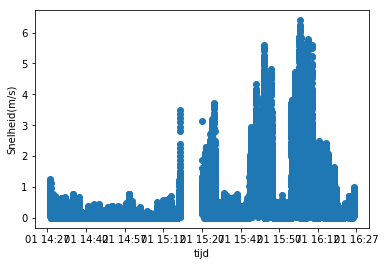

In [349]:
dates = matplotlib.dates.date2num(dates_list)
plt.plot_date(dates, speedList)
plt.ylabel('Snelheid(m/s)')
plt.xlabel('tijd')
plt.show()

Er is hier te zien hoe de wedstrijd verliep voor deze speler qua sprinten. Je ziet een aantal keren de grafiek omhoog springen wat aanduid dat de speler zeer waarschijnlijk op dat moment een sprintje aan het trekken was. Ook is er te zien dat er een leeg stukje is wat aan zou duiden dat het op dat moment rust was in de wedstrijd.<br>
We hebben deze vorm van visualisatie gebruikt omdat je dan duidelijk de snelheid kon aflezen over het geheel.

<font size=5em>Acceleratie op het X,Y,Z as</font><br>
Bokeh lijnplot om te laten zien wat een speler uitvoert door de wedstrijd. Dus welke kant een speler op rent (X,Y) en of een speler spring (Z).<br>
Wat hier te zien is, is misschien moeilijk maar in principe zijn de X en Y as altijd tegenstrijdig tegen elkaar. Als de één 1 ophoog gaat, gaat de ander 1 omlaag. De enige uitschieter af en toe is het Z as waar je kan zien of de speler springt als de grafiek ineens ophoog springt of een sliding maakt als de grafiek omlaag gaat.

In [350]:
source = ColumnDataSource(data=newCor)
p = figure(title="Acceleratie", x_axis_label='tijd', y_axis_label='g-force')
p.line('GPStijd', 'acc_x(g-force)',legend="X acc", source=source, line_color="blue")
p.line('GPStijd', 'acc_y',legend="Y acc", source=source, line_color="orange")
p.line('GPStijd', 'acc_z',legend="Z acc", source=source, line_color="green")
show(p)

<font size=5em>Gemiddelde en standaarddeviatie</font><br>
Eerst een Array maken voor alle data waar het gemiddelde en standaarddeviatie van berekend zou kunnen worden. Daarna worden deze waardes geprint en wordt er van de Snelheid een plot gemaakt om Normale verdeling te laten zien.

In [351]:
latitudeArray = newCor['latitude'].values[:rowCount]
longitudeArray = newCor['longitude'].values[:rowCount]
snelheidArray = newCor['snelheid(m/s)'].values[:rowCount]
acc_xArray = newCor['acc_x(g-force)'].values[:rowCount]
acc_yArray = newCor['acc_y'].values[:rowCount]
acc_zArray = newCor['acc_z'].values[:rowCount]
gyro_xArray = newCor['gyro_x(deg/s)'].values[:rowCount]
gyro_yArray = newCor['gyro_y'].values[:rowCount]
gyro_zArray = newCor['gyro_z'].values[:rowCount]

latitudeMean = latitudeArray.mean()
latitudeStd = np.std(latitudeArray)

longitudeMean = longitudeArray.mean()
longitudeStd = np.std(longitudeArray)

snelheidMean = snelheidArray.mean()
snelheidStd = np.std(snelheidArray)

acc_xMean = acc_xArray.mean()
acc_xStd = np.std(acc_xArray)

acc_yMean = acc_yArray.mean()
acc_yStd = np.std(acc_yArray)

acc_zMean = acc_zArray.mean()
acc_zStd = np.std(acc_zArray)

gyro_xMean = gyro_xArray.mean()
gyro_xStd = np.std(gyro_xArray)

gyro_yMean = gyro_yArray.mean()
gyro_yStd = np.std(gyro_yArray)

gyro_zMean = gyro_zArray.mean()
gyro_zStd = np.std(gyro_zArray)

print('Gemiddelde latitude = '+str(latitudeMean))
print('Standaarddeviatie latitude = '+str(latitudeStd))

print("")

print('Gemiddelde longitude = '+str(longitudeMean))
print('Standaarddeviatie longitude = '+str(longitudeStd))

print("")

print('Gemiddelde snelheid = '+str(snelheidMean))
print('Standaarddeviatie snelheid = '+str(snelheidStd))

print("")

print('Gemiddelde acc_x = '+str(acc_xMean))
print('Standaarddeviatie acc_x = '+str(acc_xStd))

print("")

print('Gemiddelde acc_y = '+str(acc_yMean))
print('Standaarddeviatie acc_y = '+str(acc_yStd))

print("")

print('Gemiddelde acc_y = '+str(acc_zMean))
print('Standaarddeviatie acc_y = '+str(acc_zStd))

print("")

print('Gemiddelde gyro_x = '+str(gyro_xMean))
print('Standaarddeviatie gyro_x = '+str(gyro_xStd))

print("")

print('Gemiddelde gyro_y = '+str(gyro_yMean))
print('Standaarddeviatie gyro_y = '+str(gyro_yStd))

print("")

print('Gemiddelde gyro_z = '+str(gyro_zMean))
print('Standaarddeviatie gyro_z = '+str(gyro_zStd))

Gemiddelde latitude = 52.0787129453
Standaarddeviatie latitude = 0.00016384631231

Gemiddelde longitude = 5.14568217162
Standaarddeviatie longitude = 0.0002024655199

Gemiddelde snelheid = 0.39431201258
Standaarddeviatie snelheid = 0.724696478986

Gemiddelde acc_x = 0.821631522102
Standaarddeviatie acc_x = 0.478113238525

Gemiddelde acc_y = -0.530931002716
Standaarddeviatie acc_y = 0.33295496873

Gemiddelde acc_y = 0.0249560189965
Standaarddeviatie acc_y = 0.187532267091

Gemiddelde gyro_x = -2.02461270033
Standaarddeviatie gyro_x = 42.914216149

Gemiddelde gyro_y = 1.29315565686
Standaarddeviatie gyro_y = 38.9305600612

Gemiddelde gyro_z = 1.20947437221
Standaarddeviatie gyro_z = 20.7489504597


Normale verdeling pdf latitude: 0.0
Normale verdeling pdf longitude: 0.0
Normale verdeling pdf snelheid: 0.474752304935
Normale verdeling pdf acc_x: 0.190590117801
Normale verdeling pdf acc_y: 0.336024931413
Normale verdeling pdf acc_z: 2.10857261094
Normale verdeling pdf gyro_x: 0.00928593330952
Normale verdeling pdf gyro_y: 0.0102418832516
Normale verdeling pdf gyro_z: 0.0191944690626


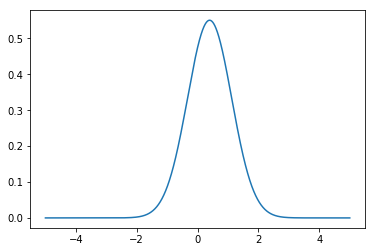

In [352]:
print("Normale verdeling pdf latitude: "+str(scipy.stats.norm(latitudeMean,latitudeStd).pdf(0)))
print("Normale verdeling pdf longitude: "+str(scipy.stats.norm(longitudeMean,longitudeStd).pdf(0)))
print("Normale verdeling pdf snelheid: "+str(scipy.stats.norm(snelheidMean,snelheidStd).pdf(0)))
print("Normale verdeling pdf acc_x: "+str(scipy.stats.norm(acc_xMean,acc_xStd).pdf(0)))
print("Normale verdeling pdf acc_y: "+str(scipy.stats.norm(acc_yMean,acc_yStd).pdf(0)))
print("Normale verdeling pdf acc_z: "+str(scipy.stats.norm(acc_zMean,acc_zStd).pdf(0)))
print("Normale verdeling pdf gyro_x: "+str(scipy.stats.norm(gyro_xMean,gyro_xStd).pdf(0)))
print("Normale verdeling pdf gyro_y: "+str(scipy.stats.norm(gyro_yMean,gyro_yStd).pdf(0)))
print("Normale verdeling pdf gyro_z: "+str(scipy.stats.norm(gyro_zMean,gyro_zStd).pdf(0)))

x = np.linspace(-5,5,100000)
y = scipy.stats.norm(snelheidMean,snelheidStd).pdf(x)
plt.plot(x,y)
plt.show()

Hier een geplotte normale verdeling van de Snelheid. Dit is een normale verdeling omdat de grafiek symmetrisch loopt en het de vorm heeft van een normale verdeling.

<font size='5em'>Scikit Learn</font><br>
Een lineaire regressie grafiek plotten om de toekomst te kunnen voorspelen aan de hand van de huidige data. Tabel met de correlatie tussen de attributen.


In [353]:
newCor.corr()

,GPStijd,dt(ms),latitude,longitude,snelheid(m/s),acc_x(g-force),acc_y,acc_z,gyro_x(deg/s),gyro_y,gyro_z,heart rate(bpm)
GPStijd,1.000000,0.002279,-0.096658,-0.621374,0.399926,-0.009206,-0.073476,0.037848,0.000478,0.001806,-0.008230,NaN
dt(ms),0.002279,1.000000,0.001246,-0.003637,-0.001583,0.002407,0.003917,-0.001838,0.001630,0.005528,-0.000574,NaN
latitude,-0.096658,0.001246,1.000000,0.283378,0.146233,0.081152,0.196461,-0.052283,-0.003795,0.002780,-0.007562,NaN
longitude,-0.621374,-0.003637,0.283378,1.000000,-0.411410,-0.039978,-0.027804,-0.030510,-0.023747,0.001117,-0.010039,NaN
snelheid(m/s),0.399926,-0.001583,0.146233,-0.411410,1.000000,0.126372,0.136347,0.013944,0.008847,-0.000988,-0.000291,NaN
acc_x(g-force),-0.009206,0.002407,0.081152,-0.039978,0.126372,1.000000,0.185726,-0.060331,-0.021548,0.090240,0.027293,NaN
acc_y,-0.073476,0.003917,0.196461,-0.027804,0.136347,0.185726,1.000000,-0.218690,0.008075,-0.021889,-0.022374,NaN
acc_z,0.037848,-0.001838,-0.052283,-0.030510,0.013944,-0.060331,-0.218690,1.000000,0.066408,0.044598,0.279423,NaN
gyro_x(deg/s),0.000478,0.001630,-0.003795,-0.023747,0.008847,-0.021548,0.008075,0.066408,1.000000,-0.088575,0.420529,NaN
gyro_y,0.001806,0.005528,0.002780,0.001117,-0.000988,0.090240,-0.021889,0.044598,-0.088575,1.000000,-0.011446,NaN


In de onderstaande scatter plot is te zien dat er een kleine lineaire regressie plaatsvindt tussen de Acc_y en Acc_x. Er zijn ook een paar afwijkers die er voor zorgen dat de correlatie kleiner wordt tussen de gegevens.

m:  0.129338695686
c:  -0.637199752119


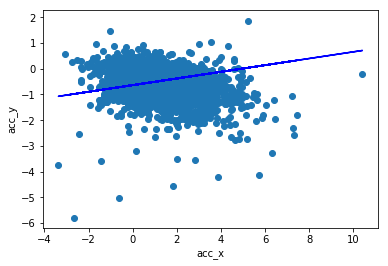

In [354]:
x = newCor[["acc_x(g-force)"]]
y = newCor[["acc_y"]]
linreg = LinearRegression().fit(x,y)
print('m: ', linreg.coef_[0][0])
print('c: ', linreg.intercept_[0])
regressie = linreg.predict(x)
plt.scatter(x,y)
plt.plot(x,regressie,color='blue')
plt.xlabel('acc_x')
plt.ylabel('acc_y')
plt.show()

In [355]:
print("Grootste afwijkers")
absolute_deviations = abs(regressie - y)
absolute_deviations.sort_values(by='acc_y', ascending=False).head()

Grootste afwijkers


,acc_y
81855,4.799173
61477,4.310774
73330,4.251428
75429,4.146903
73187,4.069694
